# Class Meeting 15
### 2022-03-23

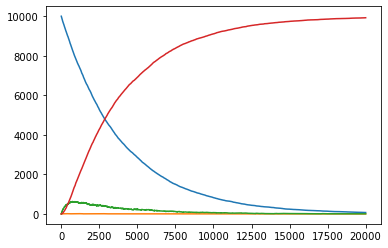

In [22]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

h = 1.0
steps = 20000

# Create array of bins to track number of atoms over each time-step
bismuth213_bin = np.zeros(steps, dtype=int)
bismuth213_bin[0] = 10000

thallium209_bin = np.zeros(steps, dtype=int)
lead209_bin = np.zeros(steps, dtype=int)
bismuth_bin = np.zeros(steps, dtype=int)

# Half-life of elements in seconds
Bi213_lambda = 46 * 60
Tl209_lambda = 2.2 * 60
Pb209_lambda = 3.3 * 60


def decay_probability(t):
    return 1 - 2 ** -(h / t)


for i in range(1, steps):
    bismuth213_bin[i] = bismuth213_bin[i - 1]
    thallium209_bin[i] = thallium209_bin[i - 1]
    lead209_bin[i] = lead209_bin[i - 1]
    bismuth_bin[i] = bismuth_bin[i - 1]

    # print(bismuth213_bin[i], thallium209_bin[i], lead209_bin[i], bismuth_bin[i])

    # Decay for lead 209 into elemental bismuth
    for pb in range(lead209_bin[i]):
        if random() < decay_probability(Pb209_lambda):
            bismuth_bin[i] += 1
            lead209_bin[i] -= 1

    # Decay for thallium 209 into lead 209
    for tl in range(thallium209_bin[i]):
        if random() < decay_probability(Tl209_lambda):
            lead209_bin[i] += 1
            thallium209_bin[i] -= 1

    # Decay for bismuth 209 into lead or thallium 209
    for bs in range(bismuth213_bin[i]):
        if random() < decay_probability(Bi213_lambda):
            if random() < 0.9791:
                lead209_bin[i] += 1
            else:
                thallium209_bin[i] += 1

            bismuth213_bin[i] -= 1

plt.plot(range(steps), bismuth213_bin)
plt.plot(range(steps), thallium209_bin)
plt.plot(range(steps), lead209_bin)
plt.plot(range(steps), bismuth_bin)


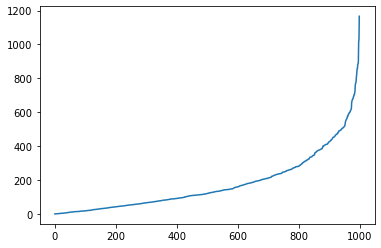

In [45]:
tau = 3.053 * 60
u = 1 / tau

random_nums = np.random.random(1000)
x_nums = [-(np.log(1 - z) / u) for z in random_nums]
x_sorted = np.sort(x_nums)

plt.plot(range(1000), x_sorted)